In [2]:
# Starting off by importing relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns

In [8]:
# Importing the iris.csv and saving it in a dataframe, 'iris_df'.
# for some reason I couldn't open it from 'Statistics and analysis'. The filepath wouldn't accept blank spaces.
filepath = "c:/Users/Predator/Documents/iris.csv"
iris_df = pd.read_csv(filepath)

___
### Initial data exploration

In [9]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Quick glance for any missing values.
iris_df.isna().sum()
# No missing values found. Nice.

sepal_length     0
 sepal_width     0
 petal_length    0
 petal_width     0
 class           0
dtype: int64

In [16]:
# How many irises are there per species, in the dataset?
iris_df[" class"].value_counts()
# Noticed straight away that the naming in the iris.csv file is off. There are whitespaces before "sepal_width", "petal_length", "petal_width" and "class".
# Just to avoid confusion and potential errors I will rename these columns.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name:  class, dtype: int64

In [17]:
# renaming the columns
iris_df = iris_df.rename(columns={' sepal_width': 'sepal_width', ' petal_length': 'petal_length', ' petal_width': 'petal_width', ' class': 'class'})

In [19]:
iris_df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

By using the .describe() function we're able to quickly glance over the data and see the mean, standard deviation and min, max values of all 150 iris flowers.

One thing to note is that this function calculates and treats every flower as the same species, meaning this data can be very misleading.

In [20]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
# by using a simple for-loop I can display each class(species) on their own instead.
# this gives us a more accurate and representative form of data.
# it still uses the .describe() function, this time on the specific species.
for i in iris_df["class"].unique():
    print(f"{i}")
    display(iris_df[iris_df["class"] == i].describe()) # using display instead of print, because it gives a nicer output.

Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Iris-versicolor


,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Iris-virginica


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


___
## Petals

Interestingly, this data above tells us a completely different story than the data we got from using .describe() on the entire dataset. 

We can clearly see that the petals on Iris-setosa are much smaller than its' counterparts on Iris-versicolor and Iris-virginica, even though the sepal width is bigger. 

This way of displaying isn't that easy on the eyes, so I'll display the same data with plots instead.


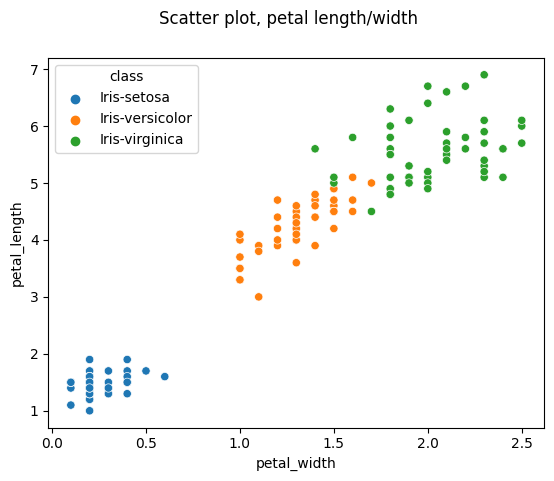

In [53]:
sns.scatterplot(iris_df, x = "petal_width", y = "petal_length", hue = "class");
plt.suptitle("Scatter plot, petal length/width");

Much easier to get a perception of the differences of the petals!

The plot above seem to show a strong correlation between petal length and width.

By adding a regression line we can clearly see that there's a strong correlation between the width and length of the petals, across all species.

There seems to be a a larger deviation on the Iris-virginica compared to the setosa and versicolor, though. This is more apparent when we divide them by species too.

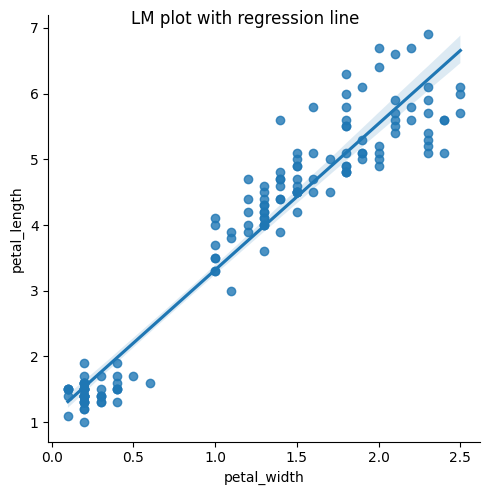

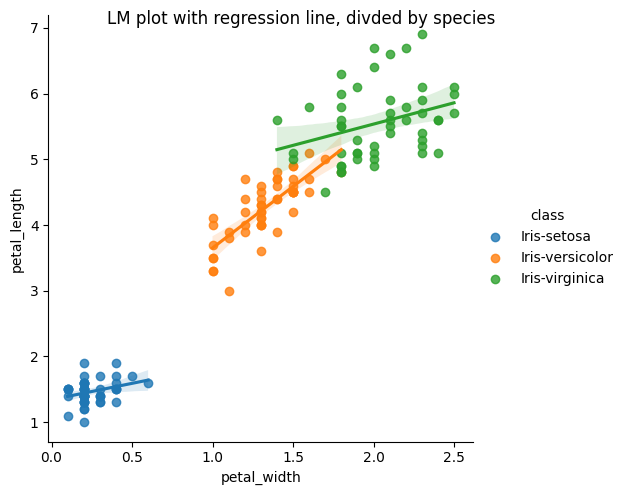

In [52]:
sns.lmplot(iris_df, x = "petal_width", y = "petal_length");
plt.suptitle("LM plot with regression line");

sns.lmplot(iris_df, x = "petal_width", y = "petal_length", hue = "class");
plt.suptitle("LM plot with regression line, divded by species");

____
## Sepal

Even before plottning anything, I do believe the real interesting parts of my analysis starts with the sepals. 

Looking at the data above, when I printed the dataframe, seperated by species, there seemed to be a large deviation on the sepals. Plotting them will give me a clearer picture.

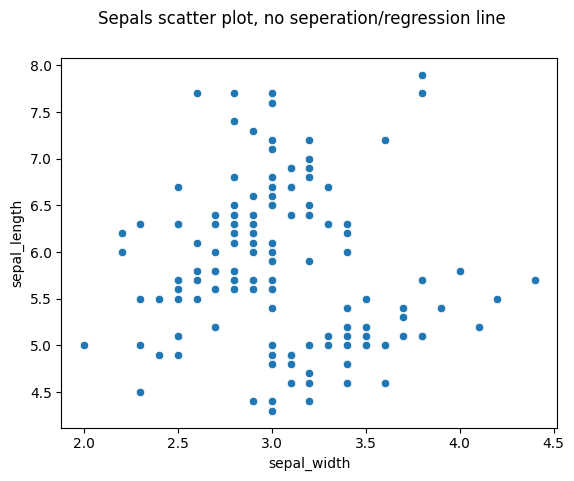

In [54]:
sns.scatterplot(iris_df, x = "sepal_width", y = "sepal_length");
plt.suptitle("Sepals scatter plot, no seperation/regression line");

Wow! When plotting without seperating on species the data seems to be all over the place. When I plotted the petals, even before adding a regression line or seperating by species, there seemed to be a large correlation between the length and the width of the petals. Initially, just by looking at the above plot (Sepals scatter plot, no seperation/regression line), there doesn't seem to be much of a correlation.

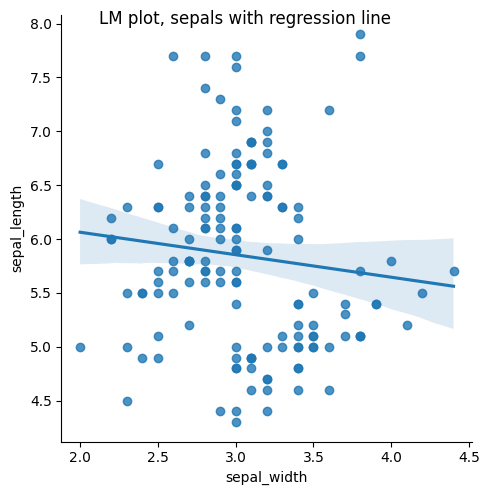

In [56]:
sns.lmplot(iris_df, x = "sepal_width", y = "sepal_length");
plt.suptitle("LM plot, sepals with regression line");

Still very hard to read anything of notice from this data (according to me), atleast when compared to the petals. What happens if I seperate by species instead?

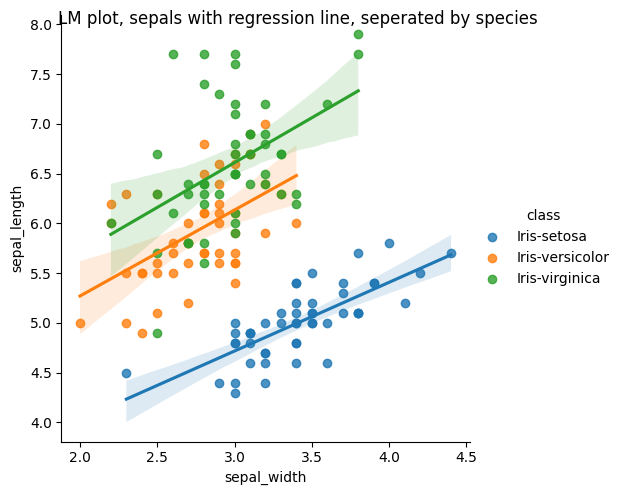

In [57]:
sns.lmplot(iris_df, x = "sepal_width", y = "sepal_length",  hue = "class");
plt.suptitle("LM plot, sepals with regression line, seperated by species");

By seperating by species we get a much clearer picture. There seem to be some linear correlation for the setosa, with the width and length och the sepals.

The same can not be said about the versicolor and virginica. There's SOME correlation but the data seem to deviate a lot. Where's the setosa seem to have a larger range, the virginica and versicolor seem to have more "oddities", almost like a few datapoints are random, especially the virginica. 

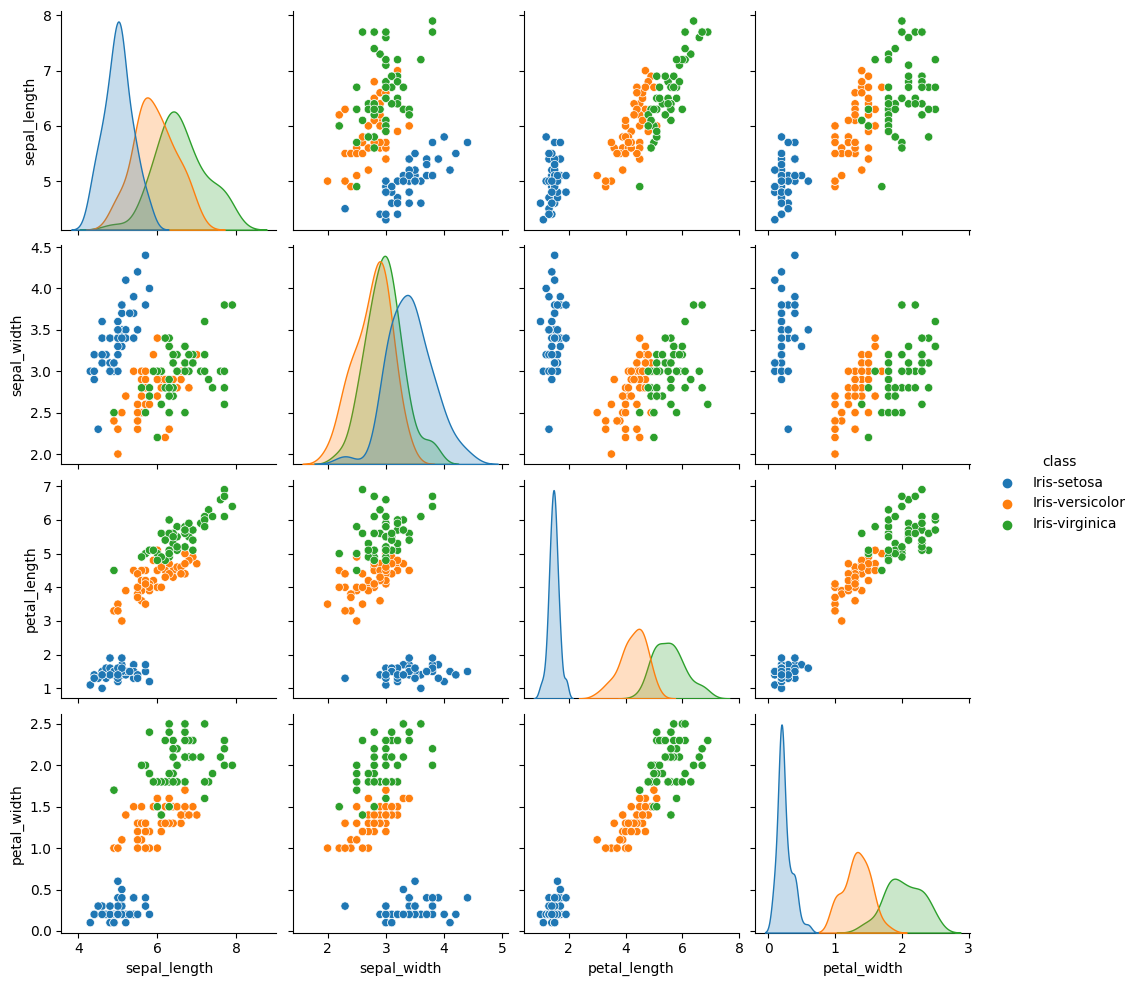

In [91]:
sns.pairplot(iris_df, hue="class"); # Found this cool way of representing all the data in one plot.

In [60]:
corr = iris_df.corr()
corr

C:\Users\Predator\AppData\Local\Temp\ipykernel_3644\740090581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris_df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot: >

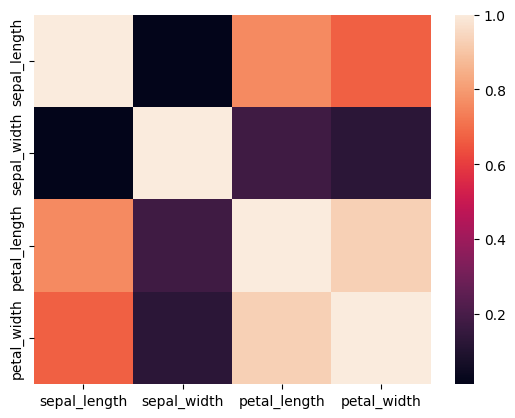

In [61]:
sns.heatmap(corr**2) # A higher value (or brighter color) represents a strong correlation.
# This plot displays a large correlation between petal length and width, but a much lower correlation between sepals overall and sepal length/width

___
## Confidence interval
We can calculate the confidence interval in different ways. I am going to show how to do it both by "hand" in python, but also how to do it with SciPy.

Since sigma is unknown in this dataset we can use the t-statstic to calculate the confidence interval. 

I chose to do it on Iris-virginica sepal width because it has the lowest correlation between the size of the sepal height and petal width/height.

In [62]:
from scipy.stats import t # import t-statistica 

virginica = iris_df[iris_df["class"] == "Iris-virginica"]

In [64]:
mean = np.mean(virginica["sepal_width"]) # calculates the mean from the sample
std = np.std(virginica["sepal_width"], ddof=1) # calculates the standard deviation from the sample, with 1 degree of freedom
n = len(virginica["sepal_width"]) # calculates n from the sample

alpha = 0.05 # set alpha to 0.05 since our confidence interval is 95 %
t_crit = t.ppf(1-alpha/2, n-1) # formula to calculate the t-crit
sem = std / np.sqrt(n) # calculate standard error of the mean

upper = mean + t_crit * sem # upper limit
lower = mean - t_crit * sem # lower limit

In [82]:
print(f"Upper limit: {upper:.3f}") # ':.3f' = shows three decimals
print(f"Lower limit: {lower:.3f}")
print(f"Confidence interval (\u03B1=0.05) for average sepal width in cm of \'Iris-Virginica\': {mean:.3f} \u00B1 {t_crit*sem:.3f}")

Upper limit: 3.066
Lower limit: 2.882
Confidence interval (α=0.05) for average sepal width in cm of 'Iris-Virginica': 2.974 ± 0.092


"Smart" way to do it with SciPy: 

In [84]:
sem = scs.sem(virginica["sepal_width"]) # calculates standard error of the mean

lower, upper = t.interval(confidence=1-alpha, df=n-1, loc=mean, scale=sem)

print(f"Confidence interval (\u03B1=0.05) for average speal width in cm of \'Iris-Virginica\': {round(lower,3)}-{round(upper,3)}")

Confidence interval (α=0.05) for average speal width in cm of 'Iris-Virginica': 2.882-3.066


In [88]:
corr2 = virginica.corr()
corr2

C:\Users\Predator\AppData\Local\Temp\ipykernel_3644\3046933442.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = virginica.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


<AxesSubplot: >

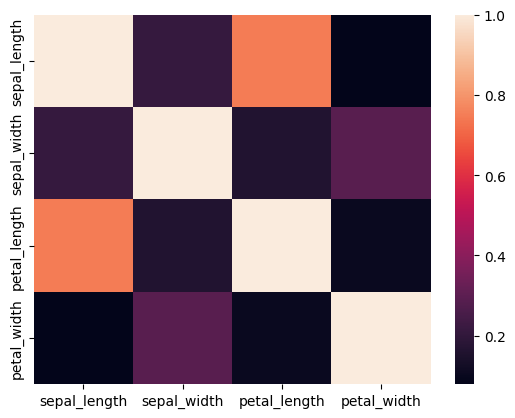

In [90]:
sns.heatmap(corr2**2)

____
## Conclusion
____

The intent of this analysis was to discover if there are any correlation between the width and height of the petals and sepals of the iris-family, specifically the Iris Setosa, Iris Versicolour and Iris Virginica.

### Petals
Using a model that calculates and displays the linear regression works very well for the petals, as there is a significant correlation between the petal width and the petal length, across all three species.
Note that there are a few outliers, especially with the Virginica. My understanding of why this is, is because on average the petals of the Virginica are a fair bit longer than the other two species, especially the Setosa, and the standard deviation is quite high, in both width and height. 
___

### Sepals
A significant correlation between the sepals could not be proven. Between the species, OR a correlation between Irises of the same species. The result might be different with a larger sample size, but with only 150 Irises, 50 of each species, a correlation could NOT be proven between the sepal length and width.
___